In [1]:
from keras.datasets import mnist

In [2]:
dataset = mnist.load_data('mnist.db')

In [3]:
len(dataset)

2

In [4]:
train, test = dataset

In [5]:
len(train)

2

In [6]:
X_train, y_train = train

In [7]:
X_test, y_test = test

In [8]:
len(X_train)

60000

In [9]:
len(y_train)

60000

In [10]:
len(X_test)

10000

In [11]:
len(y_test)

10000

In [12]:
X_train[0].shape

(28, 28)

In [13]:
y_train[0].shape

()

In [14]:
X_test[0].shape

(28, 28)

In [15]:
y_test[0].shape

()

In [16]:
import matplotlib.pyplot as plot

In [17]:
image = X_train[0]

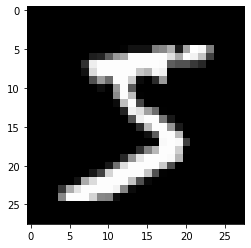

In [18]:
plot.imshow(image, cmap='gray')

In [19]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [20]:
image.shape

(28, 28)

In [21]:
type(image)

numpy.ndarray

In [22]:
image_1d = image.reshape(28*28)

In [23]:
image_1d.shape

(784,)

In [24]:
image_1d

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [25]:
X_train.shape

(60000, 28, 28)

In [26]:
X_train_1d = X_train.reshape(-1, 28*28)

In [27]:
X_train_1d

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [28]:
X_test_1d = X_test.reshape(-1,   28*28)

In [29]:
X_test_1d.shape

(10000, 784)

In [30]:
X_train_1d_f = X_train_1d.astype('float32')

In [31]:
X_test_1d_f = X_test_1d.astype('float32')

In [32]:
y_train.shape

(60000,)

In [33]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [34]:
from keras.utils.np_utils import to_categorical

In [35]:
y_train_cat = to_categorical(y_train)

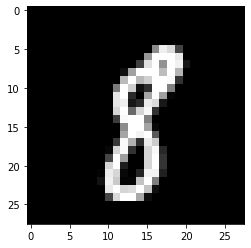

In [36]:
img = X_train[300]
plot.imshow(img , cmap='gray')

In [37]:
y_train[300]

8

In [38]:
y_train_cat[300]


array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [39]:
from keras.models import Sequential

In [40]:
model  = Sequential()

In [41]:
from keras.layers import Dense

In [42]:
model.add(
    Dense( units=512 , input_dim=28*28 , activation='relu')
)

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
Total params: 401,920
Trainable params: 401,920
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.add(
    Dense( units=256 , activation='relu')
)

In [45]:
model.add(
    Dense( units=128 , activation='relu')
)


In [46]:
model.add(
    Dense( units=64 , activation='relu')
)

In [47]:
model.add(
    Dense( units=10 , activation='softmax')
)

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(
            optimizer="RMSprop" , 
            loss='categorical_crossentropy',
            metrics=['accuracy']
             )

In [50]:
model.fit(X_train_1d_f , y_train_cat, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 32s 16ms/step - loss: 0.9335 - accuracy: 0.8855
Epoch 2/2
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3579 - accuracy: 0.9331


In [51]:
img_test = X_test[15]

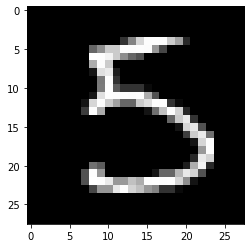

In [52]:
plot.imshow(img_test, cmap='gray')

In [53]:
img_test_1d = img_test.reshape(-1,28*28)

In [54]:
model.predict(img_test_1d)

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.0406251e-17,
        0.0000000e+00, 1.0000000e+00, 6.2018376e-35, 0.0000000e+00,
        3.5060042e-18, 1.5495694e-22]], dtype=float32)